Failed to download (trying next):
HTTP Error 503: Service Unavailable



100%|██████████| 9912422/9912422 [00:00<00:00, 120492194.57it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



Failed to download (trying next):
HTTP Error 503: Service Unavailable



100%|██████████| 28881/28881 [00:00<00:00, 23770740.55it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable



100%|██████████| 1648877/1648877 [00:00<00:00, 120509006.89it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 13359417.09it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

Train dataset shape: torch.Size([60000, 28, 28])
Train targets shape: torch.Size([60000])
Classes: ['0 - zero', '1 - one', '2 - two', '3 - three', '4 - four', '5 - five', '6 - six', '7 - seven', '8 - eight', '9 - nine']
Sample image: tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,  

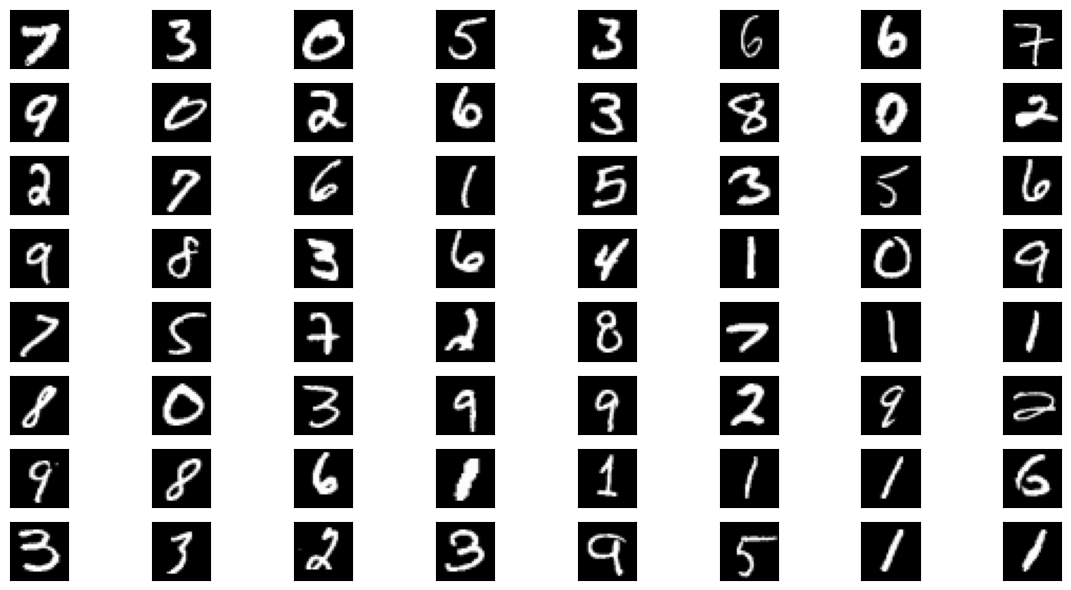

Discriminator(
  (model): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Dropout(p=0.3, inplace=False)
    (3): Linear(in_features=128, out_features=64, bias=True)
    (4): LeakyReLU(negative_slope=0.2)
    (5): Dropout(p=0.3, inplace=False)
    (6): Linear(in_features=64, out_features=32, bias=True)
    (7): LeakyReLU(negative_slope=0.2)
    (8): Dropout(p=0.3, inplace=False)
    (9): Linear(in_features=32, out_features=1, bias=True)
  )
)
Generator(
  (model): Sequential(
    (0): Linear(in_features=100, out_features=32, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Dropout(p=0.3, inplace=False)
    (3): Linear(in_features=32, out_features=64, bias=True)
    (4): LeakyReLU(negative_slope=0.2)
    (5): Dropout(p=0.3, inplace=False)
    (6): Linear(in_features=64, out_features=128, bias=True)
    (7): LeakyReLU(negative_slope=0.2)
    (8): Dropout(p=0.3, inplace=False)
    (9): Linear(in_features=12

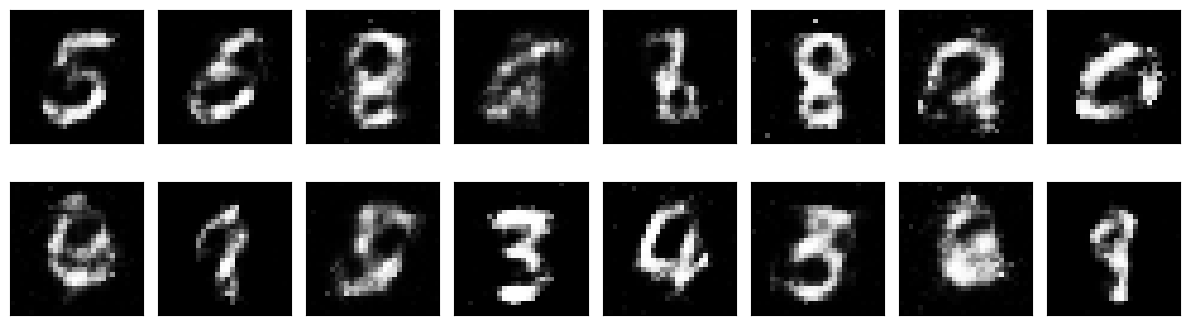

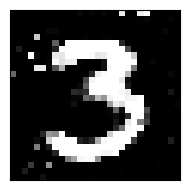

In [1]:
import math
import pickle as pkl
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

# Define transformations and load MNIST dataset
transform = transforms.Compose([transforms.ToTensor()])
train_ds = datasets.MNIST(root='./data', train=True, download=True, transform=transform)

# Print dataset information
print(f"Train dataset shape: {train_ds.data.shape}")
print(f"Train targets shape: {train_ds.targets.shape}")
print(f"Classes: {train_ds.classes}")
print(f"Sample image: {train_ds.data[0]}")
print(f"Sample target: {train_ds.targets[0]}")
print(f"Sample image max: {train_ds.data[0].max()}")
print(f"Sample image min: {train_ds.data[0].min()}")
print(f"Sample image mean: {train_ds.data[0].float().mean()}")
print(f"Sample image std: {train_ds.data[0].float().std()}")

# Create data loader
batch_size = 64
dl = DataLoader(dataset=train_ds, shuffle=True, batch_size=batch_size)

# Examine a sample batch
image_batch, _ = next(iter(dl))
print(f"Batch size: {len(image_batch)}, Type: {type(image_batch)}")
print(f"Image shape: {image_batch[0].shape}")

# Utility function to display images
def display_images(images, n_cols=4, figsize=(12, 6)):
    n_images = len(images)
    n_rows = math.ceil(n_images / n_cols)
    plt.figure(figsize=figsize)
    for idx in range(n_images):
        ax = plt.subplot(n_rows, n_cols, idx + 1)
        image = images[idx].permute(1, 2, 0)
        cmap = 'gray' if image.shape[2] == 1 else plt.cm.viridis
        ax.imshow(image, cmap=cmap)
        ax.set_xticks([])
        ax.set_yticks([])
    plt.tight_layout()
    plt.show()

display_images(images=image_batch, n_cols=8)

# Define Discriminator
class Discriminator(nn.Module):
    def __init__(self, in_features, out_features):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(in_features, 128),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(128, 64),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(64, 32),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(32, out_features)
        )

    def forward(self, x):
        x = x.view(x.size(0), -1)
        return self.model(x)

# Define Generator
class Generator(nn.Module):
    def __init__(self, in_features, out_features):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(in_features, 32),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(32, 64),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(64, 128),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(128, out_features),
            nn.Tanh()
        )

    def forward(self, x):
        return self.model(x)

# Loss functions
def real_loss(predicted_outputs, loss_fn, device):
    batch_size = predicted_outputs.shape[0]
    targets = torch.ones(batch_size).to(device)
    return loss_fn(predicted_outputs.squeeze(), targets)

def fake_loss(predicted_outputs, loss_fn, device):
    batch_size = predicted_outputs.shape[0]
    targets = torch.zeros(batch_size).to(device)
    return loss_fn(predicted_outputs.squeeze(), targets)

# Training function
def train_gan(d, g, d_optim, g_optim, loss_fn, dl, n_epochs, device, verbose=False):
    print(f'Training on [{device}]...')
    z_size = 100
    fixed_z = torch.randn(16, z_size).to(device)
    fixed_samples = []
    d_losses = []
    g_losses = []

    for epoch in range(n_epochs):
        print(f'Epoch [{epoch + 1}/{n_epochs}]:')
        d.train()
        g.train()
        d_running_loss = 0
        g_running_loss = 0

        for real_images, _ in dl:
            real_images = real_images.to(device)

            # Train discriminator
            d_optim.zero_grad()
            real_images = (real_images * 2) - 1
            d_real_logits = d(real_images)
            d_real_loss = real_loss(d_real_logits, loss_fn, device)

            z = torch.randn(batch_size, z_size).to(device)
            fake_images = g(z)
            d_fake_logits = d(fake_images.detach())
            d_fake_loss = fake_loss(d_fake_logits, loss_fn, device)

            d_loss = d_real_loss + d_fake_loss
            d_loss.backward()
            d_optim.step()
            d_running_loss += d_loss.item()

            # Train generator
            g_optim.zero_grad()
            z = torch.randn(batch_size, z_size).to(device)
            fake_images = g(z)
            g_logits = d(fake_images)
            g_loss = real_loss(g_logits, loss_fn, device)
            g_loss.backward()
            g_optim.step()
            g_running_loss += g_loss.item()

            if verbose and curr_batch % 400 == 0:
                print(f'\tBatch [{curr_batch:>4}/{len(dl):>4}] - d_loss: {d_loss.item():.6f}\tg_loss: {g_loss.item():.6f}')

        d_epoch_loss = d_running_loss / len(dl)
        g_epoch_loss = g_running_loss / len(dl)
        d_losses.append(d_epoch_loss)
        g_losses.append(g_epoch_loss)
        print(f'epoch_d_loss: {d_epoch_loss:.6f} \tepoch_g_loss: {g_epoch_loss:.6f}')

        g.eval()
        fixed_samples.append(g(fixed_z).detach().cpu())

    with open('fixed_samples.pkl', 'wb') as f:
        pkl.dump(fixed_samples, f)

    return d_losses, g_losses

# Instantiate models
d = Discriminator(in_features=784, out_features=1)
g = Generator(in_features=100, out_features=784)
print(d)
print(g)

# Instantiate optimizers and loss function
d_optim = optim.Adam(d.parameters(), lr=0.002)
g_optim = optim.Adam(g.parameters(), lr=0.002)
loss_fn = nn.BCEWithLogitsLoss()

# Setup device
device = 'cuda' if torch.cuda.is_available() else 'cpu'
# Train the GAN
n_epochs = 50
d_losses, g_losses = train_gan(d, g, d_optim, g_optim, loss_fn, dl, n_epochs, device)

# Function to display generated images
def show_generated_images(epoch, n_cols=8):
   with open('fixed_samples.pkl', 'rb') as f:
       saved_data = pkl.load(f)
   epoch_data = saved_data[epoch - 1]
   epoch_data = (epoch_data + 1) / 2  # Re-scale to 0-1 range
   batch_size, channel, height, width = len(epoch_data), 1, 28, 28
   image_batch = epoch_data.view(batch_size, channel, height, width)
   display_images(images=image_batch, n_cols=n_cols, figsize=(12, 4))

# Display generated images after 50 epochs
show_generated_images(epoch=50, n_cols=8)

# Generate a new fake image using the trained generator
g.to('cpu')
g.eval()
z = torch.randn(1, 100)
fake_image = g(z)
fake_image = fake_image.view(1, 1, 28, 28).detach()
display_images(fake_image, n_cols=1, figsize=(2, 2))